# LSTM 기반 주가예측모델

## 시계열 데이터 분석 Time Series Data
시계열 데이터란 **시간의 흐름에 따라 관찰하거나 측정한 데이터**를 말한다. 이 데이터는 일반적으로 시간의 순서를 가지며, 특정 시점에서의 값을 나타낸다. 예를 들어, 일일 주식 가격, 시간별 기온, 월별 매출 등이 시계열 데이터의 대표적인 예이다.

**주요 특징**
1. **시간 순서**  
   - 데이터가 시간의 흐름에 따라 정렬되어 있어야 한다. 시간의 순서가 데이터를 분석할 때 중요한 기준이 된다.
2. **시간 종속성**  
   - 이전 시점의 데이터가 이후 시점의 데이터에 영향을 미칠 수 있다.
3. **패턴과 추세**  
   - 주기적인 패턴(계절성)이나 장기적인 변화(추세)를 포함할 수 있다.
4. **불확실성**  
   - 시계열 데이터는 종종 노이즈(잡음)를 포함하며, 예측이 어려울 수 있다.

**활용**
- **금융**: 주식 가격, 환율 변동
- **기상**: 기온, 강수량 예측
- **경제**: GDP, 실업률 변화
- **소비자 행동**: 웹사이트 방문 트래픽, 제품 판매 데이터

**분석 및 모델링 방법**
- **EDA (탐색적 데이터 분석)**  
  - 데이터 시각화, 계절성, 추세 확인
- **통계적 모델링**  
  - ARIMA, SARIMA 등
- **머신러닝**  
  - 시계열 데이터에 특화된 RNN, LSTM, Transformer 등을 활용

시계열 데이터는 과거 데이터를 기반으로 미래를 예측하거나 현재의 상태를 분석하는 데 중요한 역할을 한다.

In [1]:
%pip install finance-datareader

Note: you may need to restart the kernel to use updated packages.


FinanceDataReader(보통 fdr로 임포트)은 파이썬에서 주가/지수/환율 같은 금융 시계열 데이터를 쉽게 가져오게 해주는 라이브러리이다.
pandas.DataFrame 형태로 바로 받아서 분석·시각화·모델링까지 바로 진행 가능하다.

하는 일: 종목 코드(예: 삼성전자 005930), 지수(예: KOSPI), 해외 종목(예: AAPL) 등을 지정해서 기간별 가격 데이터(시가/고가/저가/종가/거래량 등) 를 불러옴
장점: 웹 크롤링/API 호출을 직접 짤 필요 없이 fdr.DataReader(...) 한 줄로 데이터 로드 가능
주의: 데이터는 “어디서 가져오느냐(데이터 소스)”에 따라 지원 범위/컬럼/정확도/지연이 조금씩 다를 수 있음

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import FinanceDataReader as fdr # 금융 데이터 수집(주가/지수 등)

In [4]:
# FinanceDataReader로 삼성전자 주가 데이터 가져오기
samsung_code = '005930' # 종목코드
samsung = fdr.DataReader(samsung_code)  # 종목코드로 주가 데이터 로드(DataLoad)

samsung.tail(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2026-01-12,141000,142000,136900,138800,26271134,-0.001439
2026-01-13,139800,140200,136900,137600,22384699,-0.008646
2026-01-14,137000,140300,136800,140300,18444394,0.019622
2026-01-15,139000,144000,138300,143900,24701126,0.025659
2026-01-16,145300,149500,144300,148900,30000219,0.034746
2026-01-19,147200,150600,146600,149300,22762497,0.002686
2026-01-20,148500,149300,143900,145200,24059218,-0.027461
2026-01-21,141900,149800,141800,149500,31703610,0.029614
2026-01-22,155000,157000,150800,152300,32073624,0.018729


Open: 시작가  
High: 고가  
Low : 저가  
Close : 종가(이걸 많이 활용)  
Volume : 거래량  
Change : 전일 대비 변화율/량  

In [8]:
#apple = fdr.DataReader('AAPL') # 전체 기간
apple = fdr.DataReader('AAPL', '2025-01-01', '2026-01-01')  # 2025년 데이터
apple

,Open,High,Low,Close,Volume,Adj Close
2024-12-31,252.440002,253.279999,249.429993,250.419998,39480700,249.292526
2025-01-02,248.929993,249.100006,241.820007,243.850006,55740700,242.752106
2025-01-03,243.360001,244.179993,241.889999,243.360001,40244100,242.264313
2025-01-06,244.309998,247.330002,243.199997,245.000000,45045600,243.896912
2025-01-07,242.979996,245.550003,241.350006,242.210007,40856000,241.119476
...,...,...,...,...,...,...
2025-12-24,272.339996,275.429993,272.200012,273.809998,17910600,273.809998
2025-12-26,274.160004,275.369995,272.859985,273.399994,21521800,273.399994
2025-12-29,272.690002,274.359985,272.350006,273.760010,23715200,273.760010
2025-12-30,272.809998,274.079987,272.279999,273.079987,22139600,273.079987


## 주식데이터 시각화

In [ ]:
naver_code = '035420'
naver = fdr.DataReader(naver_code)
naver.index     # 날짜 확인 (인덱스가 거래일) = 시계열 처리

DatetimeIndex(['2013-11-05', '2013-11-06', '2013-11-07', '2013-11-08',
               '2013-11-11', '2013-11-12', '2013-11-13', '2013-11-14',
               '2013-11-15', '2013-11-18',
               ...
               '2026-01-12', '2026-01-13', '2026-01-14', '2026-01-15',
               '2026-01-16', '2026-01-19', '2026-01-20', '2026-01-21',
               '2026-01-22', '2026-01-23'],
              dtype='datetime64[ns]', name='Date', length=3000, freq=None)

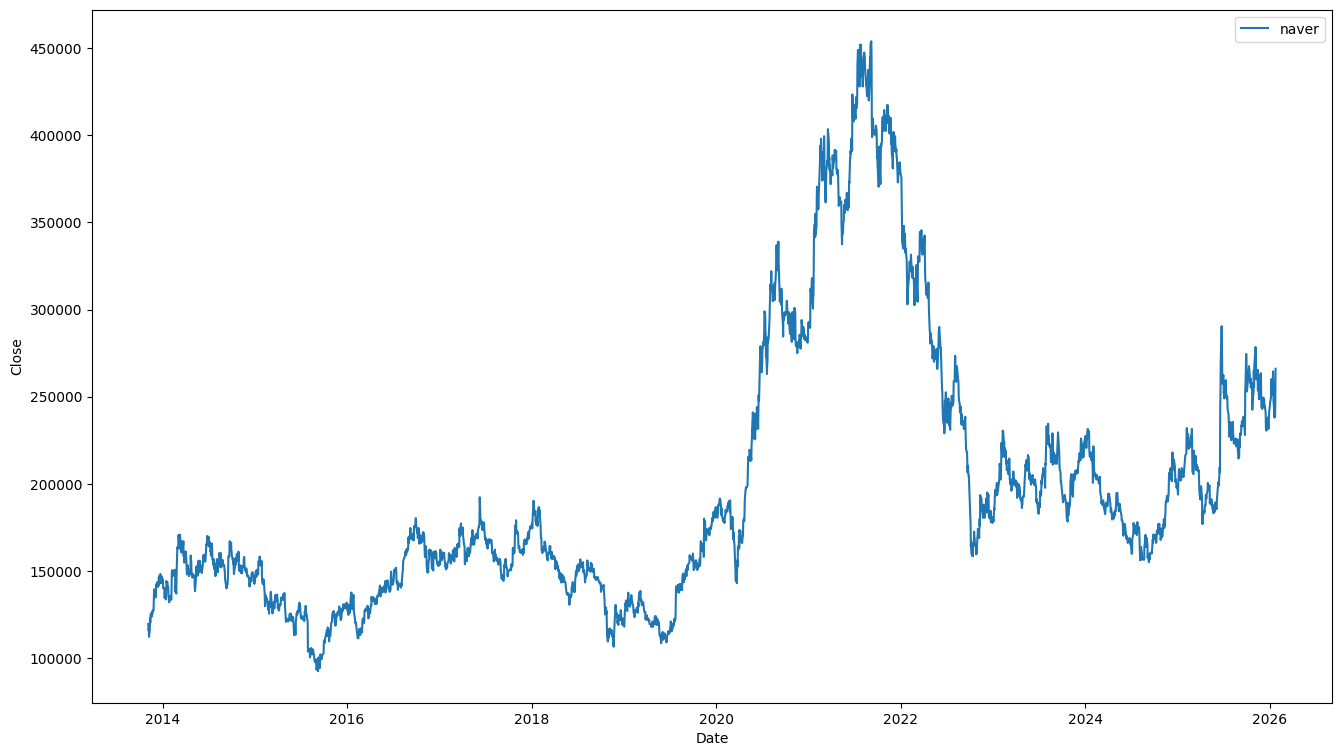

In [11]:
plt.figure(figsize=(16, 9))
plt.plot(naver.index, naver['Close'], label='naver')    # 날짜-종가 시계열 라인 플롯
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()

## 학습데이터 생성

In [ ]:
# 종가(Close) 정규화(Min-Max Scaling) : 0 ~ 1
from sklearn.preprocessing import MinMaxScaler

prices = naver['Close'].values      # 종가를 numpy 배열로 추출(1차원)


scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices.reshape(-1, 1)).flatten()   # 2D 변환 후 스케일링 -> 1D 변환
prices_scaled


array([0.07505621, 0.06563892, 0.06730112, ..., 0.40398651, 0.42334658,
       0.48004392], shape=(3000,))

In [ ]:
# 시계열 데이터를 window_size 길이만큼 잘라서(슬라이딩 윈도우) 입력(X)와 다음 값(y)으로 만드는 함수
def create_dataset(data, window_size=20):
    X, y = [], []
    
    for i in range(len(data) - window_size):    # 윈도우가 끝까지 갈 수 있는 구간만 반복
        inputs = data[i: i + window_size]       # 길이 window_size 만큼의 입력 구간
        labels = data[i + window_size]          # 입력 다음 시점의 값(예측 타겟)
        X.append(inputs)
        y.append(labels)
        
    return np.array(X), np.array(y)             # 리스트를 numpy 배열로 변환해 반환

X, y = create_dataset(prices_scaled)            # 정규화된 종가로 (X, y) 생성
X.shape, y.shape

((2980, 20), (2980,))

In [ ]:
# 입력 윈도우(X), 타겟(y)을 하나의 DataFrame으로 확인
df = pd.DataFrame(X)        # 입력 시퀀스(X)를 컬럼(윈도우 시점) 단위로 DataFrame 변환
df['target'] = y            # 다음 시점 값(y)를 target 컬럼으로 추가
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,0.075056,0.065639,0.067301,0.054562,0.065639,0.084474,0.076718,0.087798,0.091675,0.090566,...,0.093335,0.090566,0.096659,0.096659,0.096106,0.111616,0.129895,0.127680,0.124911,0.124355
1,0.065639,0.067301,0.054562,0.065639,0.084474,0.076718,0.087798,0.091675,0.090566,0.086689,...,0.090566,0.096659,0.096659,0.096106,0.111616,0.129895,0.127680,0.124911,0.124355,0.117156
2,0.067301,0.054562,0.065639,0.084474,0.076718,0.087798,0.091675,0.090566,0.086689,0.093335,...,0.096659,0.096659,0.096106,0.111616,0.129895,0.127680,0.124911,0.124355,0.117156,0.118818
3,0.054562,0.065639,0.084474,0.076718,0.087798,0.091675,0.090566,0.086689,0.093335,0.090566,...,0.096659,0.096106,0.111616,0.129895,0.127680,0.124911,0.124355,0.117156,0.118818,0.137650
4,0.065639,0.084474,0.076718,0.087798,0.091675,0.090566,0.086689,0.093335,0.090566,0.096659,...,0.096106,0.111616,0.129895,0.127680,0.124911,0.124355,0.117156,0.118818,0.137650,0.137097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,0.383244,0.381861,0.395689,0.402604,0.399838,0.398455,0.384626,0.413667,0.415049,0.427495,...,0.463450,0.442707,0.438558,0.446855,0.451004,0.475895,0.462067,0.428878,0.423347,0.402604
2976,0.381861,0.395689,0.402604,0.399838,0.398455,0.384626,0.413667,0.415049,0.427495,0.434409,...,0.442707,0.438558,0.446855,0.451004,0.475895,0.462067,0.428878,0.423347,0.402604,0.419198
2977,0.395689,0.402604,0.399838,0.398455,0.384626,0.413667,0.415049,0.427495,0.434409,0.463450,...,0.438558,0.446855,0.451004,0.475895,0.462067,0.428878,0.423347,0.402604,0.419198,0.403987
2978,0.402604,0.399838,0.398455,0.384626,0.413667,0.415049,0.427495,0.434409,0.463450,0.442707,...,0.446855,0.451004,0.475895,0.462067,0.428878,0.423347,0.402604,0.419198,0.403987,0.423347


In [ ]:
# 시계열 입력/타겟을 Pytorch 텐서로 변환 후 차원 맞춰주기
import torch

X_tensor = torch.tensor(X, dtype=torch.float).unsqueeze(-1) # floatTensor 변환 후 (N, window) -> (N, window, 1)
y_tensor = torch.tensor(y, dtype=torch.float).unsqueeze(-1) # floatTensor 변환 후 (N,) -> (N, 1)로 출력 차원 맞춤
X_tensor.shape, y_tensor.shape

(torch.Size([2980, 20, 1]), torch.Size([2980, 1]))

In [ ]:
# 시계열 텐서를 학습/검증 으로 분리
train_size = int(len(X_tensor) * 0.8)           # 학습 비율 80% 기준 인덱스
X_train, X_val = X_tensor[:train_size], X_tensor[train_size:]   # 처음 ~ 80%,  그 뒤는 검증
y_train, y_val = y_tensor[:train_size], y_tensor[train_size:]   

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

torch.Size([2384, 20, 1]) torch.Size([2384, 1])
torch.Size([596, 20, 1]) torch.Size([596, 1])


시계열은 순서가 중요해서 섞지 않고 과거로 학습하고 미래로 검증한다.

## Conv1d 레이어

<img src="https://controlandlearning.wordpress.com/wp-content/uploads/2020/07/figure-1.png" width="500"/>

**1. Conv1d란?**

`nn.Conv1d`는 1차원 시퀀스 데이터를 위한 합성곱 레이어이다.  
예: 시계열 데이터, 텍스트 임베딩 등

**2. 입력/출력 형태**

- 입력 shape: `(batch_size, in_channels, seq_len)`
- 출력 shape: `(batch_size, out_channels, new_seq_len)`

**3. 주요 파라미터**

| 파라미터           | 설명                                        |
| -------------- | ----------------------------------------- |
| `in_channels`  | 입력 채널 수 (예: 임베딩 차원, 또는 이전 conv의 출력 채널 수)  |
| `out_channels` | 출력 채널 수 (필터 개수, convolution 결과 feature 수) |
| `kernel_size`  | 필터 크기 (한 번에 보는 시점의 개수)                    |
| `stride`       | 필터가 이동하는 간격 (기본값=1)                       |
| `padding`      | 입력 시퀀스 앞뒤에 0을 덧붙여서 시퀀스 길이를 조절 (기본값=0)     |


**4.출력길이 계산**

- L: 원래 시퀀스 길이

```
output_length = floor((L + 2 * padding - kernel_size) / stride) + 1
```
위 이미지에서는 패딩이 없으므로 `(5 + 2 * 0 - 2) / 1 + 1 = 4`로 처리

In [18]:
# Conv1d 입력/출력 차원 변환 흐름 확인 예제 : Conv1D 구조 확인
import torch
import torch.nn as nn 

x = torch.randn(1, 20, 1)       # (batch_size, seq_len, input_size)
print('입력', x.shape)

conv1d = nn.Conv1d(
    in_channels=1,          # 입력 채널 수(특성 수)
    out_channels= 32,       # 필터(커널) 개수 = 출력 채널 수
    kernel_size=5,          # 커널 길이 (시간축에서 보는 구간)
    padding=4               # 양쪽 패딩 길이(출력 길이 조절)
    )

x = x.permute(0, 2, 1)           # (B, T, C) -> (B, C, T)로 변환
print('in 차원변환: ', x.shape)

# Conv1D 요구사항 (batch_size, input_size, seq_len)
x = conv1d(x)
print("conv1d 출력 :", x.shape)  # Conv1d 출력 shape

x = x.permute(0, 2, 1)           # (B, C, T) -> (B, T, C)로 변환
print('out 차원변환 :', x.shape)


입력 torch.Size([1, 20, 1])
in 차원변환:  torch.Size([1, 1, 20])
conv1d 출력 : torch.Size([1, 32, 24])
out 차원변환 : torch.Size([1, 24, 32])


## 모델 생성

In [ ]:

import torch.nn as nn

# Conv1d로 로컬 패턴을 추출한 뒤 LSTM으로 시계열 요약하고 다음 값을 예측하는 회귀 모델
class StockLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, conv_filters, conv_kernel_size):
        super().__init__()
        self.conv1d = nn.Conv1d(input_size, conv_filters,               # 입력 채널 -> 필터 수(출력채널)
                                kernel_size=conv_kernel_size,           # 시간축 커널 길이
                                padding=conv_kernel_size-1               # 길이 보존 / 확장 목적 패딩
                                )
        
        self.lstm = nn.LSTM(conv_filters, hidden_size,              # Conv 출력채널을 LSTM의 입력으로 사용 
                            num_layers, batch_first=True)           # (B, T, *) 입력 형태 사용      
        self.fc1 = nn.Linear(hidden_size, 16)                       # LSTM 요약 벡터 -> 은닉 16 차원
        self.fc2 = nn.Linear(16, 1)                                 # 16 차원 -> 최종 예측값 1개
        self.relu = nn.ReLU()                                       # 비선형 활성화함수

    def forward(self, x):
        # x = (batch_size, seq_len, input_size)
        x = x.permute(0, 2, 1)                          # (B, T, C) -> B, C, T)로 변환 (Conv1d 입력형태)
        x = self.conv1d(x)                              # (B, conv_filters, T')로 합성곱 특징 추출
        x = x.permute(0, 2, 1)                          # (B, T', C')로 변환 (LSTM 입력형태)
        _, (hidden, _) = self.lstm(x)                   # hidden : (num_layers, B, H)
        output = self.fc1(hidden[-1])                   # 마지막 레이어 은닉 상태 (B, H) -> (B, 16)
        output = self.relu(output)                      # 비선형 변환
        output = self.fc2(output)                       # (B, 16) -> (B, 1)
        return output                                   # 예측값


# 모델 학습


In [23]:
# Conv1d + LST 주가 예측 모델 학습/검증 루프(MSE + Adam)
import torch.optim as optim
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = StockLSTM(
    input_size= 1,           # 입력 특성 수(종가 1개)
    hidden_size= 64,         # LSTM 은닉 크기
    num_layers= 2,           # LSTM 레이어 수
    conv_filters= 32,        # Conv1d 출력 채널(필터 수)
    conv_kernel_size= 5      # 커널 길이
).to(device)

criterion = nn.MSELoss()    # 회귀손실(MSE)
optimizer = optim.Adam(model.parameters(), lr=0.005)

# 학습 설정

epochs = 50
batch_size = 32

for epoch in tqdm(range(epochs)):
        model.train()
        permutation = torch.randperm(X_train.size()[0])
        train_loss = 0
        
        for i in range(0, X_train.size()[0], batch_size):
            indices = permutation[i : i + batch_size]
            X_batch = X_train[indices].to(device)
            y_batch = y_train[indices].to(device)
            
            optimizer.zero_grad()
            output = model(X_batch)
            loss = criterion(output, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            
        # 검증
        model.eval()
        with torch.no_grad():
              X_val = X_val.to(device)
              y_val = y_val.to(device)
              
              output = model(X_val)
              loss = criterion(output, y_val)
              val_loss = loss.item()
              
        # 에폭 로그 출력
        print(f"Epoch {epoch + 1}/{epochs}" 
              f'Train Loss {train_loss:.6f}'
              f'val_loss {val_loss:.6f}' )


  2%|▏         | 1/50 [00:00<00:24,  1.98it/s]

Epoch 1/50Train Loss 0.823968val_loss 0.000513


  4%|▍         | 2/50 [00:01<00:24,  1.98it/s]

Epoch 2/50Train Loss 0.034256val_loss 0.000473


  6%|▌         | 3/50 [00:01<00:22,  2.09it/s]

Epoch 3/50Train Loss 0.031574val_loss 0.000368


  8%|▊         | 4/50 [00:01<00:21,  2.10it/s]

Epoch 4/50Train Loss 0.034709val_loss 0.000799


 10%|█         | 5/50 [00:02<00:21,  2.05it/s]

Epoch 5/50Train Loss 0.030436val_loss 0.000456


 12%|█▏        | 6/50 [00:02<00:21,  2.07it/s]

Epoch 6/50Train Loss 0.032164val_loss 0.000815


 14%|█▍        | 7/50 [00:03<00:20,  2.05it/s]

Epoch 7/50Train Loss 0.042548val_loss 0.000776


 16%|█▌        | 8/50 [00:03<00:20,  2.07it/s]

Epoch 8/50Train Loss 0.044531val_loss 0.000286


 18%|█▊        | 9/50 [00:04<00:19,  2.10it/s]

Epoch 9/50Train Loss 0.019329val_loss 0.000485


 20%|██        | 10/50 [00:04<00:19,  2.09it/s]

Epoch 10/50Train Loss 0.026091val_loss 0.000267


 22%|██▏       | 11/50 [00:05<00:19,  2.05it/s]

Epoch 11/50Train Loss 0.019347val_loss 0.000262


 24%|██▍       | 12/50 [00:07<00:37,  1.01it/s]

Epoch 12/50Train Loss 0.018624val_loss 0.000575


 26%|██▌       | 13/50 [00:09<00:51,  1.39s/it]

Epoch 13/50Train Loss 0.019301val_loss 0.000402


 28%|██▊       | 14/50 [00:12<00:59,  1.66s/it]

Epoch 14/50Train Loss 0.025085val_loss 0.000247


 30%|███       | 15/50 [00:14<01:05,  1.86s/it]

Epoch 15/50Train Loss 0.020381val_loss 0.000304


 32%|███▏      | 16/50 [00:16<01:09,  2.03s/it]

Epoch 16/50Train Loss 0.029423val_loss 0.000310


 34%|███▍      | 17/50 [00:18<00:59,  1.79s/it]

Epoch 17/50Train Loss 0.025004val_loss 0.000299


 36%|███▌      | 18/50 [00:18<00:44,  1.40s/it]

Epoch 18/50Train Loss 0.027615val_loss 0.000225


 38%|███▊      | 19/50 [00:18<00:34,  1.11s/it]

Epoch 19/50Train Loss 0.022905val_loss 0.000230


 40%|████      | 20/50 [00:19<00:27,  1.09it/s]

Epoch 20/50Train Loss 0.016651val_loss 0.000209


 42%|████▏     | 21/50 [00:19<00:22,  1.30it/s]

Epoch 21/50Train Loss 0.015152val_loss 0.000377


 44%|████▍     | 22/50 [00:20<00:18,  1.49it/s]

Epoch 22/50Train Loss 0.018504val_loss 0.000327


 46%|████▌     | 23/50 [00:20<00:16,  1.64it/s]

Epoch 23/50Train Loss 0.021444val_loss 0.000210


 48%|████▊     | 24/50 [00:21<00:14,  1.78it/s]

Epoch 24/50Train Loss 0.022405val_loss 0.000264


 50%|█████     | 25/50 [00:21<00:13,  1.89it/s]

Epoch 25/50Train Loss 0.014778val_loss 0.000334


 52%|█████▏    | 26/50 [00:22<00:13,  1.81it/s]

Epoch 26/50Train Loss 0.017876val_loss 0.000218


 54%|█████▍    | 27/50 [00:22<00:12,  1.78it/s]

Epoch 27/50Train Loss 0.018697val_loss 0.000219


 56%|█████▌    | 28/50 [00:23<00:12,  1.79it/s]

Epoch 28/50Train Loss 0.020244val_loss 0.000257


 58%|█████▊    | 29/50 [00:23<00:11,  1.87it/s]

Epoch 29/50Train Loss 0.017249val_loss 0.000232


 60%|██████    | 30/50 [00:24<00:11,  1.80it/s]

Epoch 30/50Train Loss 0.018159val_loss 0.000269


 62%|██████▏   | 31/50 [00:25<00:10,  1.85it/s]

Epoch 31/50Train Loss 0.015539val_loss 0.000573


 64%|██████▍   | 32/50 [00:25<00:09,  1.91it/s]

Epoch 32/50Train Loss 0.018750val_loss 0.000231


 66%|██████▌   | 33/50 [00:25<00:08,  1.97it/s]

Epoch 33/50Train Loss 0.022659val_loss 0.000345


 68%|██████▊   | 34/50 [00:26<00:08,  1.94it/s]

Epoch 34/50Train Loss 0.015965val_loss 0.000278


 70%|███████   | 35/50 [00:27<00:07,  1.92it/s]

Epoch 35/50Train Loss 0.024498val_loss 0.000246


 72%|███████▏  | 36/50 [00:27<00:07,  1.93it/s]

Epoch 36/50Train Loss 0.016292val_loss 0.000209


 74%|███████▍  | 37/50 [00:28<00:09,  1.31it/s]

Epoch 37/50Train Loss 0.015957val_loss 0.000255


 76%|███████▌  | 38/50 [00:31<00:15,  1.26s/it]

Epoch 38/50Train Loss 0.015628val_loss 0.000205


 78%|███████▊  | 39/50 [00:33<00:17,  1.59s/it]

Epoch 39/50Train Loss 0.016552val_loss 0.000205


 80%|████████  | 40/50 [00:34<00:12,  1.26s/it]

Epoch 40/50Train Loss 0.016481val_loss 0.000204


 82%|████████▏ | 41/50 [00:34<00:09,  1.04s/it]

Epoch 41/50Train Loss 0.018472val_loss 0.000404


 84%|████████▍ | 42/50 [00:35<00:06,  1.16it/s]

Epoch 42/50Train Loss 0.019064val_loss 0.000246


 86%|████████▌ | 43/50 [00:35<00:05,  1.33it/s]

Epoch 43/50Train Loss 0.017017val_loss 0.000206


 88%|████████▊ | 44/50 [00:36<00:04,  1.50it/s]

Epoch 44/50Train Loss 0.019899val_loss 0.000384


 90%|█████████ | 45/50 [00:36<00:03,  1.59it/s]

Epoch 45/50Train Loss 0.016908val_loss 0.000276


 92%|█████████▏| 46/50 [00:37<00:02,  1.72it/s]

Epoch 46/50Train Loss 0.020122val_loss 0.000221


 94%|█████████▍| 47/50 [00:37<00:01,  1.80it/s]

Epoch 47/50Train Loss 0.023588val_loss 0.000286


 96%|█████████▌| 48/50 [00:38<00:01,  1.87it/s]

Epoch 48/50Train Loss 0.017585val_loss 0.000212


 98%|█████████▊| 49/50 [00:38<00:00,  1.92it/s]

Epoch 49/50Train Loss 0.017281val_loss 0.000211


100%|██████████| 50/50 [00:39<00:00,  1.28it/s]

Epoch 50/50Train Loss 0.015006val_loss 0.000267


# 모델 예측/시각화

In [ ]:
# 검증셋 예측값 생성 후 스케일 복원(inverse_transform)
model.eval()
with torch.no_grad():
    X_val = X_val.to(device)
    output = model(X_val)
    pred = output.detach().cpu().numpy()        # GPU 텐서를 CPU numpy로 변환
    
# 스케일 복원
pred_inverse = scaler.inverse_transform(pred)   # 예측값을 원래 가격 스케일로 복원
y_val = y_val.detach().cpu().numpy()            # 실제값도 numpy로 변환
y_val_inverse = scaler.inverse_transform(y_val) # 실제값을 원래 가격 스케일로 복원

pred_inverse[-1], y_val_inverse[-1]

(array([243559.89], dtype=float32), array([266000.], dtype=float32))

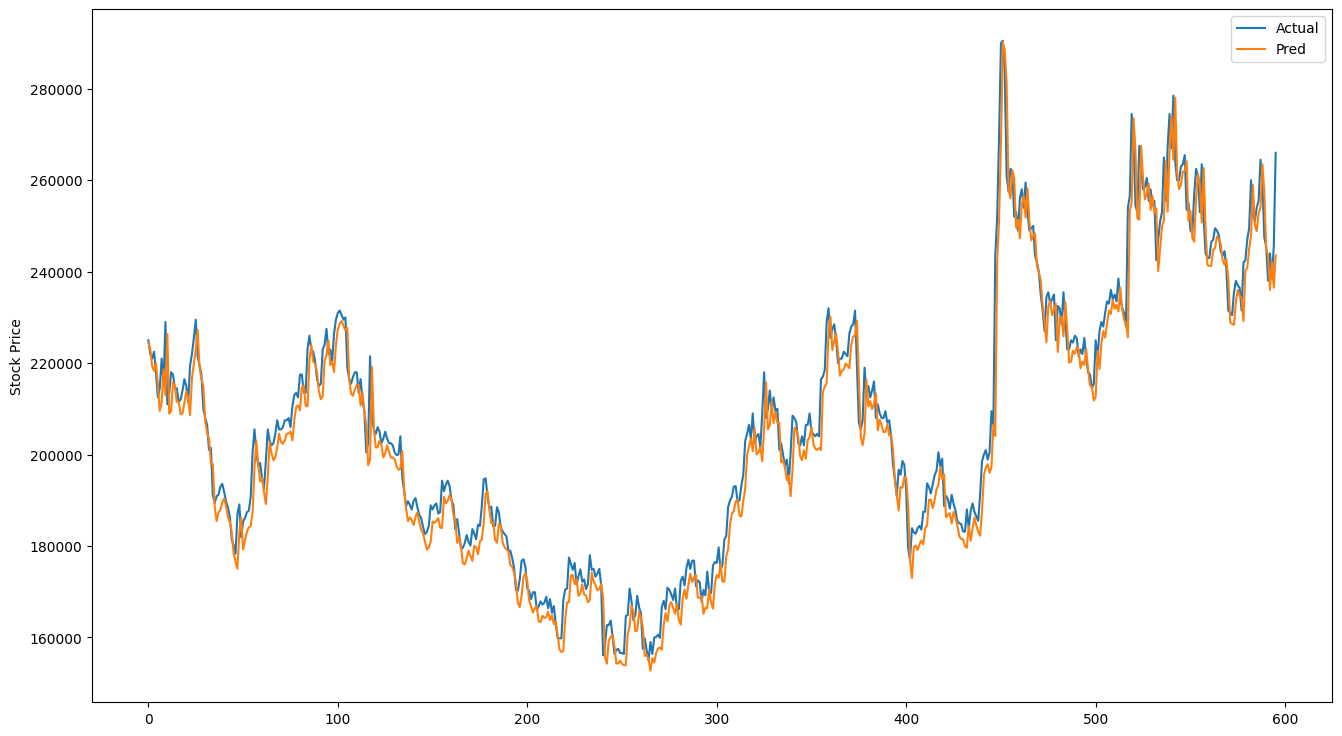

In [25]:
# 실제값 vs 예측값 시계열 비교 그래프
plt.figure(figsize=(16, 9))
plt.plot(y_val_inverse, label='Actual') # 실제 주가(복원값) 시계열
plt.plot(pred_inverse, label='Pred')    # 예측 주가(복원값) 시계열
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## 모델 예측


In [27]:
# 최근 20일 종가로 다음 주가(1-step) 예측 함수
def predict_next_stock_price(data, model, scaler, device):
    data_scaled = scaler.transform(data.reshape(-1, 1))        # 최근 종가를 0~1 범위로 정규화
    data_tensor = torch.tensor(data_scaled, dtype=torch.float) # numpy → torch 텐서 변환
    data_tensor = data_tensor.unsqueeze(0)                     # (seq_len, 1) → (batch=1, seq_len, feature=1)
    data_tensor = data_tensor.to(device)                       # GPU/CPU로 이동
    print(data_tensor.shape)                                   # 입력 텐서 shape 확인용

    model.eval()                                               # 모델을 평가 모드로 전환
    with torch.no_grad():                                      # gradient 계산 비활성화
        output = model(data_tensor)                            # 다음 시점 주가 예측
        pred = output.detach().cpu().numpy()                  # 예측 결과를 numpy 배열로 변환

    pred_inverse = scaler.inverse_transform(pred)              # 정규화된 예측값을 원래 가격 스케일로 복원
    return pred_inverse[-1]                                    # 최종 예측 종가 반환


data = naver['Close'].values[-20:]                              # 최근 20일 종가 데이터 추출
pred_price = predict_next_stock_price(data, model, scaler, device)  # 다음 종가 예측 실행
pred_price                                                      # 예측된 종가 출력

torch.Size([1, 20, 1])


array([266026.12], dtype=float32)

최근 20일 패턴을 기반으로 다음 1일 가격을 단일 값으로 추정한다.

In [28]:
data

array([236500, 231500, 242000, 242500, 247000, 249500, 260000, 252500,
       251000, 254000, 255500, 264500, 259500, 247500, 245500, 238000,
       244000, 238500, 245500, 266000])